In [5]:
!pip install PyPortfolioOpt

Enter the number of assets: 4
Enter the name of asset 1: TCS
Enter the name of asset 2: AAPL
Enter the name of asset 3: AMZN
Enter the name of asset 4: NFLX
stock symbol: ['TCS', 'AAPL', 'AMZN', 'NFLX']
Enter the weight for TCS: 0.2
Enter the weight for AAPL: 0.3
Enter the weight for AMZN: 0.25
Enter the weight for NFLX: 0.25
weight sum 1.0
[*********************100%***********************]  4 of 4 completed
The portfolio's expected annualized return is: 0.22%
The return of the portfolio after 5 years is: 509.73%
Optimized Portfolio Weights:
TCS: 0.00
AAPL: 0.92
AMZN: 0.00
NFLX: 0.08
The expected annualized return of the optimized portfolio is: 0.29%
The expected annualized risk (volatility) of the optimized portfolio is: 0.34%
The return of the optimized portfolio after 5 years is: 543.52%
This is the optimized portfolio 0.06757168030762506
The graph of comparison:


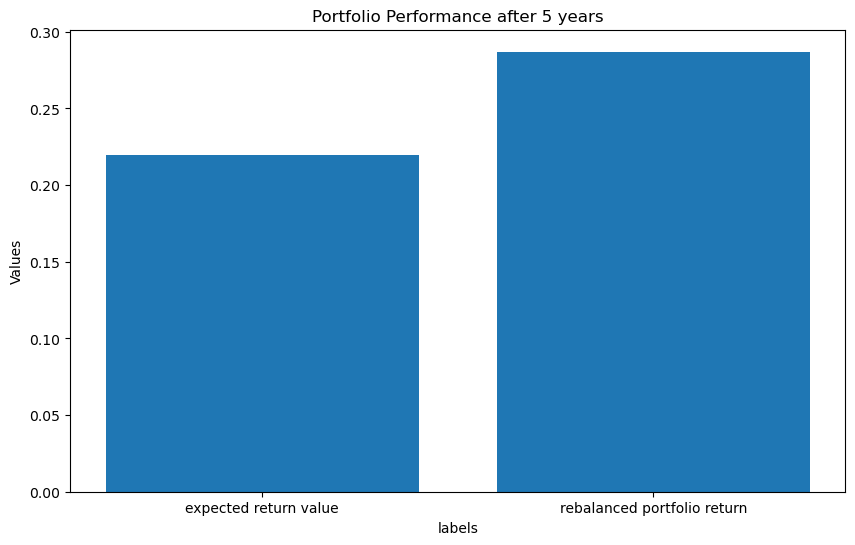

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# Function to calculate the portfolio's expected annualized return
def calculate_portfolio_return(weights, annual_returns):
    portfolio_return = sum(weights[symbol] * annual_returns[symbol] for symbol in weights)
    return portfolio_return

# Function to calculate the return of the portfolio after a specified number of years
def calculate_portfolio_return_after_n_years(portfolio_return, years=5):
    future_portfolio_value = total_investment*(1 + portfolio_return) * years
    return future_portfolio_value

# Function to calculate the return of the portfolio as a percentage
def calculate_portfolio_return_percentage(future_portfolio_value, portfolio_value):
    return_percentage = ((future_portfolio_value / total_investment) - 1) * 100
    return return_percentage

num_assets = int(input("Enter the number of assets: "))
stock_symbols = []

# Prompt the user for asset names and corresponding weights
for i in range(num_assets):
    asset = input(f"Enter the name of asset {i + 1}: ")
    stock_symbols.append(asset)
print("stock symbol:", stock_symbols) 

weights = {}
for symbol in stock_symbols:
    weight = float(input(f"Enter the weight for {symbol}: "))
    weights[symbol] = weight

weight_sum = sum(weights.values())
print("weight sum",weight_sum )
if weight_sum != 1.0:
    print("Warning: The weights do not sum up to 1.0 (or 100%). Adjusting weights...")
else:
    total_investment = 1000000

# Fetch historical price data for the stocks
    try:
        df = yf.download(stock_symbols, start='2018-01-01', end='2023-10-01')['Close']
    except Exception as e:
        print(e)
        exit()
    
    # Calculate historical annual returns for each stock
    annual_returns = {}
    for symbol in stock_symbols:
        annual_returns[symbol] = df[symbol].pct_change().mean() * 252  # 252 trading days in a year for annualization

    # Calculate the portfolio's expected annualized return
    portfolio_return = calculate_portfolio_return(weights, annual_returns)

    # Calculate the return of the portfolio after 5 years
    future_portfolio_value = total_investment*(1 + portfolio_return) * 5

    # Calculate the return of the portfolio as a percentage
    return_percentage = ((future_portfolio_value / total_investment) - 1) * 100

    # Print the results
    print(f"The portfolio's expected annualized return is: {portfolio_return:.2f}%")
    print(f"The return of the portfolio after 5 years is: {return_percentage:.2f}%")
    
    
    # Calculate historical annual returns for each stock
    annual_returns = {}
    for symbol in stock_symbols:
        annual_returns[symbol] = df[symbol].pct_change().mean() * 252  # 252 trading days in a year for annualization

    # Calculate covariance matrix and expected returns
    cov_matrix = df.pct_change().cov() * 252  # Assuming 252 trading days in a year for annualization
    expected_return = pd.Series({symbol: annual_returns[symbol] for symbol in stock_symbols})

    # Create the Efficient Frontier optimizer
    ef = EfficientFrontier(expected_return, cov_matrix)

    # Optimize for maximum Sharpe ratio (risk-adjusted return)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()

    # Calculate the expected return and risk of the optimized portfolio
    optimized_portfolio_return = ef.portfolio_performance()[0]
    optimized_portfolio_risk = ef.portfolio_performance()[1]

    # Calculate the return of the optimized portfolio after 5 years
    future_portfolio_value = total_investment * (1 + optimized_portfolio_return) * 5

    # Calculate the return of the optimized portfolio as a percentage
    optimized_return_percentage = ((future_portfolio_value / total_investment) - 1) * 100

    # Print the optimized results
    print("Optimized Portfolio Weights:")
    for symbol, weight in cleaned_weights.items():
        print(f"{symbol}: {weight:.2f}")
    print(f"The expected annualized return of the optimized portfolio is: {optimized_portfolio_return:.2f}%")
    print(f"The expected annualized risk (volatility) of the optimized portfolio is: {optimized_portfolio_risk:.2f}%")
    print(f"The return of the optimized portfolio after 5 years is: {optimized_return_percentage:.2f}%")
    
    if portfolio_return > optimized_portfolio_return:
        print("You already have a good portfolio, no need to change")
    else:
        print("This is the optimized portfolio", np.subtract(optimized_portfolio_return, portfolio_return))
        
    print("The graph of comparison:")
    plt.figure(figsize=(10, 6))
    plt.bar(['expected return value', 'rebalanced portfolio return'], [portfolio_return, optimized_portfolio_return])

    # Set the title and labels
    plt.title('Portfolio Performance after 5 years')
    plt.xlabel('labels')
    plt.ylabel('Values')

    # Show the plot
    
    plt.show()